In [2]:
#Alright, we've got our data!  Now let's get down to business.
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.read_csv("FinalProjectDataS&P500.csv")
profile = ProfileReport(df, title="Financial Sentiment Analysis")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [107]:
counts = df['Symbol'].value_counts()
counts

TSLA       24
TM         24
SOLO       24
CENN       24
RIDE       24
GOEV       24
ARVL       24
NKLA       24
FSR        24
PII        24
0175.HK    24
TTM        24
HYMTF      24
NIO        24
RACE       24
HMC        24
STLA       24
F          24
GM         24
FUV        24
Name: Symbol, dtype: int64

In [3]:
#importing required libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import numpy as np
import ast

# Simplify the dataset into only what we care about
dataframe = df.filter(['Stock History', 'Sentiment Score', 'Stock Future'])

scale = lambda x: minmax_scaling(x, columns=0)
nump = lambda x: np.array(x, dtype=np.float32)
make_float = lambda x: float(x)
#df['Tags'] = df.Tags.apply(lambda x: x[1:-1].split(','))
def is_ERR(x):
    if 'ERR' in x:
        #print('X is Err! at ' + str(x.index('ERR')))
        return 0
    else:
        return x
dataframe['Stock History'] = dataframe['Stock History'].apply(ast.literal_eval)
dataframe['Stock History'] = dataframe['Stock History'].apply(is_ERR)
#Remove rows without good stock data
dataframe = dataframe[dataframe['Stock History'] != 0]
dataframe = dataframe[dataframe['Stock Future'] != 'UNKNOWN']
dataframe['Stock History'] = dataframe['Stock History'].apply(nump)
#dataframe['Stock History'] = dataframe['Stock History'].apply(scale)
dataframe['Stock Future'] = dataframe['Stock Future'].apply(make_float)
dataframe['Sentiment Score'] = dataframe['Sentiment Score'].apply(make_float)
dataframe

,Stock History,Sentiment Score,Stock Future
0,"[133.58, 141.68, 136.295, 136.295, 130.91, 134...",13.0,151.770004
1,"[38.73, 41.49, 39.74, 39.74, 37.99, 39.13, 38....",3.0,66.300003
2,"[74.74, 81.65, 77.655, 77.655, 73.66, 79.49, 7...",3.0,123.370003
3,"[78.61, 85.37, 79.82, 79.82, 74.27, 73.02, 71....",11.0,158.520004
4,"[136.97, 142.82, 142.63, 142.63, 142.44, 145.2...",15.0,315.640015
...,...,...,...
479,"[61.29, 66.84, 62.6, 62.6, 58.36, 64.93, 61.37...",6.0,75.300003
480,"[64.82, 72.12, 68.58501, 68.58501, 65.05, 71.8...",3.0,86.480003
481,"[78.45, 78.46, 74.145004, 74.145004, 69.83, 65...",8.0,124.440002
482,"[161.51, 184.02, 175.05, 175.05, 166.08, 180.6...",13.0,390.040009


In [4]:
#For the LTSM, we don't need the sentiment score
LTSM_df = pd.DataFrame(np.column_stack(list(zip(*dataframe['Stock History']))))
extracted_col = dataframe["Stock Future"]
LTSM_df = LTSM_df.join(extracted_col)
LTSM_df

,0,1,2,3,4,5,6,7,8,9,...,761,762,763,764,765,766,767,768,769,Stock Future
0,133.580002,141.679993,136.294998,136.294998,130.910004,134.440002,137.020004,137.509995,124.889999,121.380005,...,148.580002,148.660004,147.380005,146.779999,146.779999,146.779999,146.179993,150.100006,150.589996,151.770004
1,38.730000,41.490002,39.740002,39.740002,37.990002,39.130001,38.430000,36.849998,34.750000,35.174999,...,64.489998,64.699997,63.790001,63.565002,63.565002,63.565002,63.340000,65.370003,66.300003,66.300003
2,74.739998,81.650002,77.654999,77.654999,73.660004,79.489998,79.260002,74.500000,68.000000,65.410004,...,118.389999,119.480003,117.690002,116.990005,116.990005,116.990005,116.290001,119.980003,122.639999,123.370003
3,78.610001,85.370003,79.820000,79.820000,74.269997,73.019997,71.029999,71.059998,68.820000,66.660004,...,167.309998,158.949997,162.309998,160.834991,160.834991,160.834991,159.360001,156.350006,156.699997,158.520004
4,136.970001,142.820007,142.630005,142.630005,142.440002,145.250000,146.550003,140.509995,130.509995,131.424988,...,299.640015,304.429993,306.079987,303.794983,303.794983,303.794983,301.510010,323.420013,325.980011,315.640015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,61.290001,66.839996,62.599998,62.599998,58.360001,64.930000,61.369999,57.990002,50.630001,50.315002,...,74.730003,74.370003,74.339996,74.269997,74.269997,74.269997,74.199997,74.839996,75.349998,75.300003
480,64.820000,72.120003,68.585007,68.585007,65.050003,71.820000,65.489998,64.459999,59.889999,58.264999,...,84.849998,86.540001,84.139999,83.395004,83.395004,83.395004,82.650002,85.339996,86.800003,86.480003
481,78.449997,78.459999,74.145004,74.145004,69.830002,65.489998,60.689999,62.599998,58.080002,57.300003,...,119.889999,121.870003,122.970001,123.070000,123.070000,123.070000,123.169998,124.639999,125.699997,124.440002
482,161.509995,184.020004,175.050003,175.050003,166.080002,180.660004,185.470001,185.070007,179.380005,175.050003,...,402.209991,405.000000,393.679993,393.979980,393.979980,393.979980,394.279999,406.619995,398.420013,390.040009


In [5]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(LTSM_df.T).T
scaled_data

array([[0.1756092 , 0.26615236, 0.20595792, ..., 0.36027279, 0.36574999,
        0.37894033],
       [0.07788649, 0.13189828, 0.0976517 , ..., 0.59921729, 0.61741691,
        0.61741691],
       [0.15157677, 0.23944558, 0.18864443, ..., 0.72685654, 0.76068152,
        0.76996436],
       ...,
       [0.26633467, 0.26645614, 0.21405154, ..., 0.82730142, 0.84017484,
        0.8248725 ],
       [0.        , 0.04968658, 0.02988701, ..., 0.54103391, 0.52293401,
        0.50443673],
       [0.2184119 , 0.17523982, 0.14564199, ..., 0.54998989, 0.58415503,
        0.56113295]])

In [6]:
from sklearn.model_selection import train_test_split
def getDataSets(lookback):
    training_np, test_np = train_test_split( scaled_data,
                                        test_size=0.1,
                                        shuffle = True)
    train_np, val_np = train_test_split( training_np,
                                        test_size=0.2,
                                        shuffle = True)
    train_x, train_y, val_x, val_y = [], [], [], []
    past_index = 770-lookback
    for i in range(0,len(train_np)):
        train_x.append(train_np[i][past_index:770])
        train_y.append(train_np[i][770])
    for i in range(0,len(val_np)):
        val_x.append(val_np[i][past_index:770])
        val_y.append(val_np[i][770])
    train_x, train_y, val_x, val_y = np.array(train_x), np.array(train_y), np.array(val_x), np.array(val_y)
    train_x = np.reshape(train_x, (train_x.shape[0],train_x.shape[1],1))
    val_x = np.reshape(val_x, (val_x.shape[0],val_x.shape[1],1))
    return train_x, train_y, val_x, val_y

In [79]:
# create and fit the LSTM network
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
x_train, y_train, val_x, val_y = getDataSets(120)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['mse'])
model.fit(x_train, y_train, epochs=4, batch_size=1, verbose=1, validation_split = 0.2)

Epoch 1/4
278/278 [==============================] - 7s 19ms/step - loss: 1.6835 - mse: 0.4322 - val_loss: 1.0993 - val_mse: 0.2673
Epoch 2/4
278/278 [==============================] - 5s 18ms/step - loss: 0.7047 - mse: 0.1177 - val_loss: 0.5038 - val_mse: 0.0061
Epoch 3/4
278/278 [==============================] - 5s 18ms/step - loss: 0.4482 - mse: 0.0061 - val_loss: 0.5230 - val_mse: 0.0077
Epoch 4/4
278/278 [==============================] - 5s 18ms/step - loss: 0.4515 - mse: 0.0067 - val_loss: 0.5026 - val_mse: 0.0057


In [83]:
# Let's play around with this and experiment.
from tqdm.auto import tqdm
metrics_results = [['Learning Rate', 'Batch Size', 'Look-back', 'Loss', 'MSE']]
epochs_to_try = [10]
rates_to_try = [4e-5, 3.5e-5, 3e-5,2.5e-5,2e-5,1.5e-5, 1e-5]
look_to_try = [730,365,120,30,10]
batch_to_try = [1, 2, 4, 8, 16]
progress_bar = tqdm(
        range(len(epochs_to_try) * len(rates_to_try) * len(look_to_try) * len(batch_to_try)),
    )
for epoch in epochs_to_try:
    for rate in rates_to_try:
        for look in look_to_try:
            for batch in batch_to_try:
                print(f"Training model {rate}, {batch}, {look}.")
                x_train, y_train, x_val, y_val = getDataSets(look)
                model = Sequential()
                model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
                model.add(LSTM(units=50))
                model.add(Dense(1))
                callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
                # This callback will stop the training when there is no improvement in
                # the loss for two consecutive epochs.
                model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=rate),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['mse'])
                model.fit(x_train, y_train, epochs=epoch, batch_size=batch, verbose=1, validation_split = 0.2, callbacks=[callback])
                metrics = model.evaluate(x_val, y_val)
                metrics_results.append([rate, batch, look, metrics[0], metrics[1]])
                progress_bar.update(1)
metrics_results

  0%|          | 0/175 [00:00<?, ?it/s]

Training model 4e-05, 1, 730.
Epoch 1/10
278/278 [==============================] - 30s 105ms/step - loss: 2.0380 - mse: 0.4498 - val_loss: 1.3214 - val_mse: 0.3659
Epoch 2/10
278/278 [==============================] - 29s 103ms/step - loss: 1.0100 - mse: 0.2437 - val_loss: 0.7167 - val_mse: 0.1215
Epoch 3/10
278/278 [==============================] - 29s 103ms/step - loss: 0.5285 - mse: 0.0310 - val_loss: 0.4619 - val_mse: 0.0103
Epoch 4/10
278/278 [==============================] - 29s 103ms/step - loss: 0.4681 - mse: 0.0074 - val_loss: 0.4552 - val_mse: 0.0070
Epoch 5/10
278/278 [==============================] - 29s 103ms/step - loss: 0.4660 - mse: 0.0066 - val_loss: 0.4539 - val_mse: 0.0064
Epoch 6/10
278/278 [==============================] - 29s 104ms/step - loss: 0.4652 - mse: 0.0062 - val_loss: 0.4523 - val_mse: 0.0060
Epoch 7/10
278/278 [==============================] - 29s 104ms/step - loss: 0.4645 - mse: 0.0059 - val_loss: 0.4516 - val_mse: 0.0058
Epoch 8/10
278/278 [=====

70/70 [==============================] - 7s 98ms/step - loss: 11.0329 - mse: 0.6035 - val_loss: 11.5795 - val_mse: 0.6579
Epoch 5/10
70/70 [==============================] - 7s 98ms/step - loss: 11.0329 - mse: 0.6035 - val_loss: 11.5795 - val_mse: 0.6579
Epoch 6/10
3/3 [==============================] - 0s 35ms/step - loss: 11.8040 - mse: 0.6731
Training model 4e-05, 8, 365.
Epoch 1/10
35/35 [==============================] - 6s 124ms/step - loss: 2.2149 - mse: 0.4830 - val_loss: 1.8635 - val_mse: 0.5034
Epoch 2/10
35/35 [==============================] - 4s 109ms/step - loss: 1.5996 - mse: 0.4066 - val_loss: 1.5223 - val_mse: 0.4338
Epoch 3/10
35/35 [==============================] - 4s 110ms/step - loss: 1.3465 - mse: 0.3483 - val_loss: 1.2904 - val_mse: 0.3686
Epoch 4/10
35/35 [==============================] - 4s 110ms/step - loss: 1.1524 - mse: 0.2889 - val_loss: 1.0963 - val_mse: 0.3004
Epoch 5/10
35/35 [==============================] - 4s 110ms/step - loss: 0.9837 - mse: 0.2264

3/3 [==============================] - 0s 5ms/step - loss: 0.4183 - mse: 0.0035
Training model 4e-05, 4, 30.
Epoch 1/10
70/70 [==============================] - 2s 14ms/step - loss: 1.3292 - mse: 0.3470 - val_loss: 0.9404 - val_mse: 0.1939
Epoch 2/10
70/70 [==============================] - 1s 8ms/step - loss: 0.7597 - mse: 0.1363 - val_loss: 0.6216 - val_mse: 0.0473
Epoch 3/10
70/70 [==============================] - 1s 8ms/step - loss: 0.5003 - mse: 0.0179 - val_loss: 0.5187 - val_mse: 0.0065
Epoch 4/10
70/70 [==============================] - 1s 8ms/step - loss: 0.4628 - mse: 0.0058 - val_loss: 0.5180 - val_mse: 0.0059
Epoch 5/10
70/70 [==============================] - 1s 8ms/step - loss: 0.4626 - mse: 0.0055 - val_loss: 0.5176 - val_mse: 0.0058
Epoch 6/10
70/70 [==============================] - 1s 8ms/step - loss: 0.4619 - mse: 0.0053 - val_loss: 0.5174 - val_mse: 0.0059
Epoch 7/10
70/70 [==============================] - 1s 8ms/step - loss: 0.4617 - mse: 0.0052 - val_loss: 0.517

Epoch 3/10
139/139 [==============================] - 19s 136ms/step - loss: 0.4541 - mse: 0.0048 - val_loss: 0.5288 - val_mse: 0.0046
Epoch 4/10
139/139 [==============================] - 19s 135ms/step - loss: 0.4539 - mse: 0.0047 - val_loss: 0.5283 - val_mse: 0.0043
Epoch 5/10
139/139 [==============================] - 19s 135ms/step - loss: 0.4601 - mse: 0.0059 - val_loss: 0.5291 - val_mse: 0.0042
Epoch 6/10
139/139 [==============================] - 19s 135ms/step - loss: 0.4529 - mse: 0.0044 - val_loss: 0.5276 - val_mse: 0.0042
Epoch 7/10
139/139 [==============================] - 19s 135ms/step - loss: 0.4595 - mse: 0.0058 - val_loss: 0.5314 - val_mse: 0.0044
Epoch 8/10
3/3 [==============================] - 1s 71ms/step - loss: 0.4589 - mse: 0.0064
Training model 3.5e-05, 4, 730.
Epoch 1/10
70/70 [==============================] - 16s 205ms/step - loss: 11.2934 - mse: 1.0439 - val_loss: 12.1410 - val_mse: 1.1807
Epoch 2/10
70/70 [==============================] - 14s 199ms/step

Epoch 2/10
278/278 [==============================] - 5s 19ms/step - loss: 0.4426 - mse: 0.0048 - val_loss: 0.5246 - val_mse: 0.0067
Epoch 3/10
278/278 [==============================] - 5s 19ms/step - loss: 0.4436 - mse: 0.0047 - val_loss: 0.5278 - val_mse: 0.0073
Epoch 4/10
278/278 [==============================] - 5s 19ms/step - loss: 0.4415 - mse: 0.0043 - val_loss: 0.5321 - val_mse: 0.0075
Epoch 5/10
278/278 [==============================] - 5s 19ms/step - loss: 0.4421 - mse: 0.0043 - val_loss: 0.5316 - val_mse: 0.0071
Epoch 6/10
3/3 [==============================] - 0s 14ms/step - loss: 0.4643 - mse: 0.0047
Training model 3.5e-05, 2, 120.
Epoch 1/10
139/139 [==============================] - 6s 32ms/step - loss: 0.9107 - mse: 0.1922 - val_loss: 0.5720 - val_mse: 0.0310
Epoch 2/10
139/139 [==============================] - 4s 29ms/step - loss: 0.4718 - mse: 0.0081 - val_loss: 0.4963 - val_mse: 0.0038
Epoch 3/10
139/139 [==============================] - 4s 29ms/step - loss: 0.4

70/70 [==============================] - 1s 10ms/step - loss: 0.4562 - mse: 0.0049 - val_loss: 0.4552 - val_mse: 0.0039
Epoch 9/10
70/70 [==============================] - 1s 10ms/step - loss: 0.4556 - mse: 0.0048 - val_loss: 0.4573 - val_mse: 0.0041
Epoch 10/10
3/3 [==============================] - 0s 4ms/step - loss: 0.4763 - mse: 0.0034
Training model 3.5e-05, 8, 30.
Epoch 1/10
35/35 [==============================] - 2s 23ms/step - loss: 11.2504 - mse: 0.6483 - val_loss: 11.3178 - val_mse: 0.6618
Epoch 2/10
35/35 [==============================] - 0s 12ms/step - loss: 11.2504 - mse: 0.6483 - val_loss: 11.3178 - val_mse: 0.6618
Epoch 3/10
35/35 [==============================] - 0s 12ms/step - loss: 11.2504 - mse: 0.6483 - val_loss: 11.3178 - val_mse: 0.6618
Epoch 4/10
35/35 [==============================] - 0s 12ms/step - loss: 11.2504 - mse: 0.6483 - val_loss: 11.3178 - val_mse: 0.6618
Epoch 5/10
3/3 [==============================] - 0s 4ms/step - loss: 11.4925 - mse: 0.6710
Tr

139/139 [==============================] - 26s 187ms/step - loss: 0.5212 - mse: 0.0269 - val_loss: 0.4990 - val_mse: 0.0069
Epoch 4/10
139/139 [==============================] - 26s 186ms/step - loss: 0.4648 - mse: 0.0054 - val_loss: 0.5025 - val_mse: 0.0077
Epoch 5/10
139/139 [==============================] - 26s 186ms/step - loss: 0.4645 - mse: 0.0052 - val_loss: 0.5002 - val_mse: 0.0071
Epoch 6/10
139/139 [==============================] - 26s 187ms/step - loss: 0.4642 - mse: 0.0050 - val_loss: 0.4974 - val_mse: 0.0061
Epoch 7/10
139/139 [==============================] - 26s 187ms/step - loss: 0.4635 - mse: 0.0048 - val_loss: 0.4992 - val_mse: 0.0066
Epoch 8/10
139/139 [==============================] - 26s 187ms/step - loss: 0.4631 - mse: 0.0046 - val_loss: 0.5447 - val_mse: 0.0078
Epoch 9/10
139/139 [==============================] - 26s 187ms/step - loss: 0.4628 - mse: 0.0046 - val_loss: 0.5076 - val_mse: 0.0070
Epoch 10/10
3/3 [==============================] - 1s 97ms/step - 

70/70 [==============================] - 9s 129ms/step - loss: 1.0248 - mse: 0.2602 - val_loss: 0.9431 - val_mse: 0.2122
Epoch 10/10
3/3 [==============================] - 0s 48ms/step - loss: 0.8079 - mse: 0.1475
Training model 3e-05, 8, 365.
Epoch 1/10
35/35 [==============================] - 7s 150ms/step - loss: 11.3454 - mse: 0.6301 - val_loss: 11.0931 - val_mse: 0.6193
Epoch 2/10
35/35 [==============================] - 5s 139ms/step - loss: 11.3454 - mse: 0.6301 - val_loss: 11.0931 - val_mse: 0.6193
Epoch 3/10
3/3 [==============================] - 0s 46ms/step - loss: 11.6413 - mse: 0.6622
Training model 3e-05, 16, 365.
Epoch 1/10
18/18 [==============================] - 5s 169ms/step - loss: 11.3425 - mse: 0.7724 - val_loss: 11.3376 - val_mse: 0.7688
Epoch 2/10
18/18 [==============================] - 3s 147ms/step - loss: 11.3425 - mse: 0.7724 - val_loss: 11.3376 - val_mse: 0.7688
Epoch 3/10
18/18 [==============================] - 3s 147ms/step - loss: 11.3425 - mse: 0.7724 

139/139 [==============================] - 1s 7ms/step - loss: 1.3333 - mse: 0.3587 - val_loss: 1.2610 - val_mse: 0.3595
Epoch 7/10
139/139 [==============================] - 1s 7ms/step - loss: 1.1610 - mse: 0.3030 - val_loss: 1.0731 - val_mse: 0.2921
Epoch 8/10
139/139 [==============================] - 1s 7ms/step - loss: 0.9669 - mse: 0.2274 - val_loss: 0.8519 - val_mse: 0.1973
Epoch 9/10
139/139 [==============================] - 1s 7ms/step - loss: 0.7420 - mse: 0.1252 - val_loss: 0.5992 - val_mse: 0.0764
Epoch 10/10
3/3 [==============================] - 0s 5ms/step - loss: 0.4672 - mse: 0.0065
Training model 3e-05, 4, 30.
Epoch 1/10
70/70 [==============================] - 3s 23ms/step - loss: 9.1932 - mse: 0.5846 - val_loss: 2.1519 - val_mse: 0.5025
Epoch 2/10
70/70 [==============================] - 1s 10ms/step - loss: 1.8455 - mse: 0.4657 - val_loss: 1.6065 - val_mse: 0.4251
Epoch 3/10
70/70 [==============================] - 1s 10ms/step - loss: 1.5258 - mse: 0.4067 - val_

35/35 [==============================] - 0s 5ms/step - loss: 0.8166 - mse: 0.1594 - val_loss: 0.7777 - val_mse: 0.1710
Epoch 8/10
35/35 [==============================] - 0s 5ms/step - loss: 0.7332 - mse: 0.1198 - val_loss: 0.6852 - val_mse: 0.1256
Epoch 9/10
35/35 [==============================] - 0s 5ms/step - loss: 0.6586 - mse: 0.0835 - val_loss: 0.6026 - val_mse: 0.0852
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 0.5775 - mse: 0.0379
Training model 3e-05, 16, 10.
Epoch 1/10
18/18 [==============================] - 3s 28ms/step - loss: 1.9311 - mse: 0.4889 - val_loss: 1.7789 - val_mse: 0.4528
Epoch 2/10
18/18 [==============================] - 0s 6ms/step - loss: 1.7274 - mse: 0.4560 - val_loss: 1.6129 - val_mse: 0.4225
Epoch 3/10
18/18 [==============================] - 0s 6ms/step - loss: 1.5782 - mse: 0.4258 - val_loss: 1.4884 - val_mse: 0.3953
Epoch 4/10
18/18 [==============================] - 0s 6ms/step - loss: 1.4618 - mse: 0.3984 - val_loss: 1.3

Epoch 4/10
278/278 [==============================] - 15s 56ms/step - loss: 0.4628 - mse: 0.0054 - val_loss: 0.4664 - val_mse: 0.0043
Epoch 5/10
278/278 [==============================] - 15s 56ms/step - loss: 0.4657 - mse: 0.0060 - val_loss: 0.4660 - val_mse: 0.0042
Epoch 6/10
278/278 [==============================] - 15s 56ms/step - loss: 0.4619 - mse: 0.0050 - val_loss: 0.4664 - val_mse: 0.0040
Epoch 7/10
278/278 [==============================] - 15s 56ms/step - loss: 0.4618 - mse: 0.0050 - val_loss: 0.4693 - val_mse: 0.0048
Epoch 8/10
278/278 [==============================] - 16s 56ms/step - loss: 0.4614 - mse: 0.0048 - val_loss: 0.4656 - val_mse: 0.0038
Epoch 9/10
278/278 [==============================] - 16s 56ms/step - loss: 0.4641 - mse: 0.0049 - val_loss: 0.4651 - val_mse: 0.0038
Epoch 10/10
3/3 [==============================] - 0s 40ms/step - loss: 0.4609 - mse: 0.0056
Training model 2.5e-05, 2, 365.
Epoch 1/10
139/139 [==============================] - 15s 96ms/step - l

3/3 [==============================] - 0s 15ms/step - loss: 0.4662 - mse: 0.0055
Training model 2.5e-05, 4, 120.
Epoch 1/10
70/70 [==============================] - 5s 47ms/step - loss: 3.1684 - mse: 0.5652 - val_loss: 2.9057 - val_mse: 0.5833
Epoch 2/10
70/70 [==============================] - 3s 42ms/step - loss: 2.7278 - mse: 0.5526 - val_loss: 2.6930 - val_mse: 0.5727
Epoch 3/10
70/70 [==============================] - 3s 41ms/step - loss: 2.5433 - mse: 0.5423 - val_loss: 2.5254 - val_mse: 0.5620
Epoch 4/10
70/70 [==============================] - 3s 42ms/step - loss: 2.3949 - mse: 0.5320 - val_loss: 2.3861 - val_mse: 0.5512
Epoch 5/10
70/70 [==============================] - 3s 42ms/step - loss: 2.2711 - mse: 0.5217 - val_loss: 2.2684 - val_mse: 0.5405
Epoch 6/10
70/70 [==============================] - 3s 42ms/step - loss: 2.1646 - mse: 0.5114 - val_loss: 2.1659 - val_mse: 0.5297
Epoch 7/10
70/70 [==============================] - 3s 41ms/step - loss: 2.0703 - mse: 0.5010 - val_l

278/278 [==============================] - 1s 2ms/step - loss: 0.5599 - mse: 0.0499 - val_loss: 0.4712 - val_mse: 0.0036
Epoch 3/10
278/278 [==============================] - 1s 2ms/step - loss: 0.4468 - mse: 0.0043 - val_loss: 0.4739 - val_mse: 0.0038
Epoch 4/10
278/278 [==============================] - 1s 2ms/step - loss: 0.4471 - mse: 0.0043 - val_loss: 0.4708 - val_mse: 0.0034
Epoch 5/10
3/3 [==============================] - 0s 3ms/step - loss: 0.4827 - mse: 0.0022
Training model 2.5e-05, 2, 10.
Epoch 1/10
139/139 [==============================] - 2s 6ms/step - loss: 1.7230 - mse: 0.4441 - val_loss: 1.3753 - val_mse: 0.3743
Epoch 2/10
139/139 [==============================] - 0s 3ms/step - loss: 1.1477 - mse: 0.3011 - val_loss: 0.9984 - val_mse: 0.2431
Epoch 3/10
139/139 [==============================] - 0s 3ms/step - loss: 0.8386 - mse: 0.1762 - val_loss: 0.7252 - val_mse: 0.1183
Epoch 4/10
139/139 [==============================] - 0s 3ms/step - loss: 0.6066 - mse: 0.0658 - 

35/35 [==============================] - 9s 268ms/step - loss: 11.3936 - mse: 0.6663 - val_loss: 10.5322 - val_mse: 0.5944
Epoch 5/10
35/35 [==============================] - 9s 268ms/step - loss: 11.3936 - mse: 0.6663 - val_loss: 10.5322 - val_mse: 0.5944
Epoch 6/10
3/3 [==============================] - 0s 94ms/step - loss: 11.5540 - mse: 0.6904
Training model 2e-05, 16, 730.
Epoch 1/10
18/18 [==============================] - 7s 319ms/step - loss: 11.1470 - mse: 0.5920 - val_loss: 11.8367 - val_mse: 0.6550
Epoch 2/10
18/18 [==============================] - 5s 297ms/step - loss: 5.8425 - mse: 0.5713 - val_loss: 3.4209 - val_mse: 0.6287
Epoch 3/10
18/18 [==============================] - 5s 294ms/step - loss: 3.0419 - mse: 0.5548 - val_loss: 3.1003 - val_mse: 0.6190
Epoch 4/10
18/18 [==============================] - 5s 294ms/step - loss: 2.8544 - mse: 0.5485 - val_loss: 2.9788 - val_mse: 0.6142
Epoch 5/10
18/18 [==============================] - 5s 294ms/step - loss: 2.7614 - mse: 0

Epoch 7/10
278/278 [==============================] - 5s 19ms/step - loss: 0.4542 - mse: 0.0058 - val_loss: 0.4872 - val_mse: 0.0059
Epoch 8/10
278/278 [==============================] - 5s 19ms/step - loss: 0.4485 - mse: 0.0047 - val_loss: 0.4865 - val_mse: 0.0059
Epoch 9/10
278/278 [==============================] - 5s 19ms/step - loss: 0.4491 - mse: 0.0046 - val_loss: 0.4863 - val_mse: 0.0061
Epoch 10/10
3/3 [==============================] - 0s 15ms/step - loss: 0.4613 - mse: 0.0045
Training model 2e-05, 2, 120.
Epoch 1/10
139/139 [==============================] - 6s 31ms/step - loss: 11.2826 - mse: 0.6208 - val_loss: 11.5174 - val_mse: 0.6407
Epoch 2/10
139/139 [==============================] - 4s 28ms/step - loss: 11.2826 - mse: 0.6208 - val_loss: 11.5174 - val_mse: 0.6407
Epoch 3/10
139/139 [==============================] - 4s 29ms/step - loss: 11.2826 - mse: 0.6208 - val_loss: 11.5174 - val_mse: 0.6407
Epoch 4/10
139/139 [==============================] - 4s 28ms/step - loss

70/70 [==============================] - 3s 16ms/step - loss: 3.2799 - mse: 0.5627 - val_loss: 2.8272 - val_mse: 0.5258
Epoch 2/10
70/70 [==============================] - 1s 11ms/step - loss: 2.8278 - mse: 0.5527 - val_loss: 2.6517 - val_mse: 0.5186
Epoch 3/10
70/70 [==============================] - 1s 11ms/step - loss: 2.6611 - mse: 0.5450 - val_loss: 2.5051 - val_mse: 0.5111
Epoch 4/10
70/70 [==============================] - 1s 10ms/step - loss: 2.5233 - mse: 0.5370 - val_loss: 2.3842 - val_mse: 0.5036
Epoch 5/10
70/70 [==============================] - 1s 10ms/step - loss: 2.4077 - mse: 0.5291 - val_loss: 2.2823 - val_mse: 0.4962
Epoch 6/10
70/70 [==============================] - 1s 10ms/step - loss: 2.3081 - mse: 0.5212 - val_loss: 2.1929 - val_mse: 0.4889
Epoch 7/10
70/70 [==============================] - 1s 10ms/step - loss: 2.2202 - mse: 0.5134 - val_loss: 2.1130 - val_mse: 0.4815
Epoch 8/10
70/70 [==============================] - 1s 10ms/step - loss: 2.1414 - mse: 0.5056 

35/35 [==============================] - 0s 5ms/step - loss: 1.1438 - mse: 0.3000 - val_loss: 1.0784 - val_mse: 0.2524
Epoch 7/10
35/35 [==============================] - 0s 5ms/step - loss: 1.0595 - mse: 0.2688 - val_loss: 1.0040 - val_mse: 0.2245
Epoch 8/10
35/35 [==============================] - 0s 5ms/step - loss: 0.9822 - mse: 0.2378 - val_loss: 0.9369 - val_mse: 0.1974
Epoch 9/10
35/35 [==============================] - 0s 5ms/step - loss: 0.9111 - mse: 0.2075 - val_loss: 0.8737 - val_mse: 0.1703
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 0.8101 - mse: 0.1732
Training model 2e-05, 16, 10.
Epoch 1/10
18/18 [==============================] - 2s 29ms/step - loss: 2.5503 - mse: 0.5468 - val_loss: 2.2600 - val_mse: 0.5082
Epoch 2/10
18/18 [==============================] - 0s 6ms/step - loss: 2.2378 - mse: 0.5226 - val_loss: 2.0375 - val_mse: 0.4869
Epoch 3/10
18/18 [==============================] - 0s 6ms/step - loss: 2.0455 - mse: 0.5018 - val_loss: 1.8

3/3 [==============================] - 0s 39ms/step - loss: 11.0389 - mse: 0.5696
Training model 1.5e-05, 2, 365.
Epoch 1/10
139/139 [==============================] - 14s 90ms/step - loss: 11.2260 - mse: 0.6443 - val_loss: 11.8591 - val_mse: 0.7068
Epoch 2/10
139/139 [==============================] - 12s 87ms/step - loss: 11.2260 - mse: 0.6443 - val_loss: 11.8591 - val_mse: 0.7068
Epoch 3/10
3/3 [==============================] - 1s 45ms/step - loss: 10.6257 - mse: 0.5903
Training model 1.5e-05, 4, 365.
Epoch 1/10
70/70 [==============================] - 10s 128ms/step - loss: 11.1645 - mse: 0.6561 - val_loss: 11.1237 - val_mse: 0.6463
Epoch 2/10
70/70 [==============================] - 9s 122ms/step - loss: 11.1645 - mse: 0.6561 - val_loss: 11.1237 - val_mse: 0.6463
Epoch 3/10
3/3 [==============================] - 0s 44ms/step - loss: 11.7516 - mse: 0.7179
Training model 1.5e-05, 8, 365.
Epoch 1/10
35/35 [==============================] - 7s 147ms/step - loss: 11.2780 - mse: 0.7011

70/70 [==============================] - 1s 11ms/step - loss: 1.2673 - mse: 0.3399 - val_loss: 1.1631 - val_mse: 0.2992
Epoch 5/10
70/70 [==============================] - 1s 11ms/step - loss: 1.1006 - mse: 0.2833 - val_loss: 1.0121 - val_mse: 0.2437
Epoch 6/10
70/70 [==============================] - 1s 11ms/step - loss: 0.9516 - mse: 0.2240 - val_loss: 0.8741 - val_mse: 0.1855
Epoch 7/10
70/70 [==============================] - 1s 11ms/step - loss: 0.8141 - mse: 0.1626 - val_loss: 0.7459 - val_mse: 0.1258
Epoch 8/10
70/70 [==============================] - 1s 11ms/step - loss: 0.6868 - mse: 0.1017 - val_loss: 0.6321 - val_mse: 0.0705
Epoch 9/10
70/70 [==============================] - 1s 11ms/step - loss: 0.5755 - mse: 0.0485 - val_loss: 0.5360 - val_mse: 0.0265
Epoch 10/10
3/3 [==============================] - 0s 5ms/step - loss: 0.4938 - mse: 0.0056
Training model 1.5e-05, 8, 30.
Epoch 1/10
35/35 [==============================] - 3s 24ms/step - loss: 11.0637 - mse: 0.6326 - val_l

18/18 [==============================] - 0s 6ms/step - loss: 1.7254 - mse: 0.4511 - val_loss: 1.6943 - val_mse: 0.4593
Epoch 4/10
18/18 [==============================] - 0s 6ms/step - loss: 1.6392 - mse: 0.4346 - val_loss: 1.6143 - val_mse: 0.4431
Epoch 5/10
18/18 [==============================] - 0s 6ms/step - loss: 1.5659 - mse: 0.4193 - val_loss: 1.5444 - val_mse: 0.4275
Epoch 6/10
18/18 [==============================] - 0s 6ms/step - loss: 1.5007 - mse: 0.4044 - val_loss: 1.4825 - val_mse: 0.4126
Epoch 7/10
18/18 [==============================] - 0s 6ms/step - loss: 1.4425 - mse: 0.3900 - val_loss: 1.4264 - val_mse: 0.3982
Epoch 8/10
18/18 [==============================] - 0s 6ms/step - loss: 1.3896 - mse: 0.3761 - val_loss: 1.3749 - val_mse: 0.3841
Epoch 9/10
18/18 [==============================] - 0s 6ms/step - loss: 1.3408 - mse: 0.3625 - val_loss: 1.3272 - val_mse: 0.3703
Epoch 10/10
3/3 [==============================] - 0s 2ms/step - loss: 1.2627 - mse: 0.3282
Training 

Epoch 1/10
35/35 [==============================] - 7s 152ms/step - loss: 2.6938 - mse: 0.5519 - val_loss: 2.3661 - val_mse: 0.5165
Epoch 2/10
35/35 [==============================] - 5s 140ms/step - loss: 2.2371 - mse: 0.5211 - val_loss: 2.0868 - val_mse: 0.4910
Epoch 3/10
35/35 [==============================] - 5s 141ms/step - loss: 2.0159 - mse: 0.4972 - val_loss: 1.9131 - val_mse: 0.4697
Epoch 4/10
35/35 [==============================] - 5s 141ms/step - loss: 1.8635 - mse: 0.4763 - val_loss: 1.7835 - val_mse: 0.4503
Epoch 5/10
35/35 [==============================] - 5s 141ms/step - loss: 1.7446 - mse: 0.4568 - val_loss: 1.6778 - val_mse: 0.4319
Epoch 6/10
35/35 [==============================] - 5s 140ms/step - loss: 1.6456 - mse: 0.4383 - val_loss: 1.5877 - val_mse: 0.4141
Epoch 7/10
35/35 [==============================] - 5s 141ms/step - loss: 1.5599 - mse: 0.4202 - val_loss: 1.5095 - val_mse: 0.3970
Epoch 8/10
35/35 [==============================] - 5s 140ms/step - loss: 1.

3/3 [==============================] - 0s 15ms/step - loss: 11.3025 - mse: 0.8215
Training model 1e-05, 1, 30.
Epoch 1/10
278/278 [==============================] - 3s 7ms/step - loss: 1.6347 - mse: 0.4349 - val_loss: 1.1900 - val_mse: 0.2833
Epoch 2/10
278/278 [==============================] - 2s 6ms/step - loss: 1.0182 - mse: 0.2566 - val_loss: 0.8127 - val_mse: 0.1360
Epoch 3/10
278/278 [==============================] - 2s 6ms/step - loss: 0.6541 - mse: 0.0918 - val_loss: 0.5640 - val_mse: 0.0177
Epoch 4/10
278/278 [==============================] - 2s 6ms/step - loss: 0.4649 - mse: 0.0098 - val_loss: 0.5327 - val_mse: 0.0077
Epoch 5/10
278/278 [==============================] - 2s 6ms/step - loss: 0.4501 - mse: 0.0064 - val_loss: 0.5325 - val_mse: 0.0076
Epoch 6/10
278/278 [==============================] - 2s 6ms/step - loss: 0.4496 - mse: 0.0062 - val_loss: 0.5300 - val_mse: 0.0066
Epoch 7/10
278/278 [==============================] - 2s 6ms/step - loss: 0.4490 - mse: 0.0059 - 

3/3 [==============================] - 0s 3ms/step - loss: 11.3902 - mse: 0.7033
Training model 1e-05, 4, 10.
Epoch 1/10
70/70 [==============================] - 3s 10ms/step - loss: 2.0334 - mse: 0.5036 - val_loss: 1.7643 - val_mse: 0.4114
Epoch 2/10
70/70 [==============================] - 0s 5ms/step - loss: 1.7490 - mse: 0.4617 - val_loss: 1.5666 - val_mse: 0.3787
Epoch 3/10
70/70 [==============================] - 0s 4ms/step - loss: 1.5675 - mse: 0.4257 - val_loss: 1.4252 - val_mse: 0.3492
Epoch 4/10
70/70 [==============================] - 0s 4ms/step - loss: 1.4295 - mse: 0.3927 - val_loss: 1.3119 - val_mse: 0.3212
Epoch 5/10
70/70 [==============================] - 0s 4ms/step - loss: 1.3149 - mse: 0.3606 - val_loss: 1.2165 - val_mse: 0.2942
Epoch 6/10
70/70 [==============================] - 0s 4ms/step - loss: 1.2159 - mse: 0.3295 - val_loss: 1.1328 - val_mse: 0.2678
Epoch 7/10
70/70 [==============================] - 0s 4ms/step - loss: 1.1274 - mse: 0.2988 - val_loss: 1.05

[['Learning Rate', 'Batch Size', 'Look-back', 'Loss', 'MSE'],
 [4e-05, 1, 730, 0.4757465124130249, 0.006683649495244026],
 [4e-05, 2, 730, 10.59201717376709, 0.7113167643547058],
 [4e-05, 4, 730, 10.593701362609863, 0.5977737307548523],
 [4e-05, 8, 730, 0.4754865765571594, 0.0069756521843373775],
 [4e-05, 16, 730, 11.761502265930176, 0.8270576596260071],
 [4e-05, 1, 365, 0.534182608127594, 0.01861117035150528],
 [4e-05, 2, 365, 0.4657268822193146, 0.00469645531848073],
 [4e-05, 4, 365, 11.803963661193848, 0.6731135249137878],
 [4e-05, 8, 365, 0.44273611903190613, 0.006560206413269043],
 [4e-05, 16, 365, 11.492459297180176, 0.620638370513916],
 [4e-05, 1, 120, 0.4741275906562805, 0.005812246818095446],
 [4e-05, 2, 120, 0.46278950572013855, 0.003737798659130931],
 [4e-05, 4, 120, 10.964198112487793, 0.5689039826393127],
 [4e-05, 8, 120, 10.825217247009277, 0.6642722487449646],
 [4e-05, 16, 120, 11.255178451538086, 0.6305938363075256],
 [4e-05, 1, 30, 11.613870620727539, 0.647717118263244

Populating the interactive namespace from numpy and matplotlib


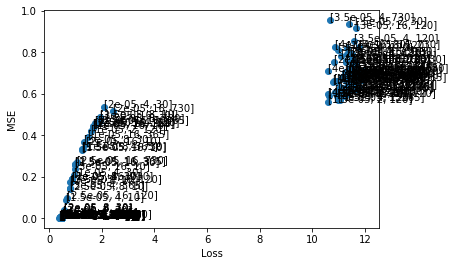

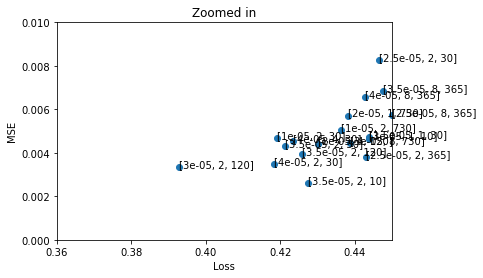

In [85]:
import matplotlib.pyplot as plt

%pylab inline
x = [val[3] for val in metrics_results[1:]]
y = [val[4] for val in metrics_results[1:]]
labels = [val[0:3] for val in metrics_results[1:]]

fig, ax = plt.subplots()
ax.scatter(x, y)

for i in range(len(labels)):
    ax.annotate(labels[i], (x[i], y[i]))

plt.xlabel("Loss")
plt.ylabel("MSE")
plt.show()

ax3 = plt.subplot()
ax3.scatter(x, y)
ax3.set_xlabel("Loss")
ax3.set_ylabel("MSE")
ax3.set_title('Zoomed in')
ax3.set_ylim(bottom=0)
ax3.set_xlim(left=0.36)
ax3.set_ylim(top=0.01)
ax3.set_xlim(right=0.45)

for i in range(len(labels)):
    ax3.annotate(labels[i], (x[i], y[i]))

In [86]:
#Looks like there's some variance here, but some clear winners!  Mid-length timeframes are better
#and a high epoch count paired with a lr of 0.00003.  Let's take our best and see if it's reproducable.
x_train, y_train, x_val, y_val = getDataSets(120)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5),
loss=tf.keras.losses.BinaryCrossentropy(),
metrics=['mse'])
model.fit(x_train, y_train, epochs=10, batch_size=2, verbose=1, validation_split = 0.2)
metrics = model.evaluate(x_val, y_val)
metrics

Epoch 1/10
139/139 [==============================] - 7s 36ms/step - loss: 1.0053 - mse: 0.2362 - val_loss: 0.6737 - val_mse: 0.1032
Epoch 2/10
139/139 [==============================] - 5s 33ms/step - loss: 0.5337 - mse: 0.0322 - val_loss: 0.4496 - val_mse: 0.0068
Epoch 3/10
139/139 [==============================] - 5s 33ms/step - loss: 0.4591 - mse: 0.0051 - val_loss: 0.4488 - val_mse: 0.0062
Epoch 4/10
139/139 [==============================] - 5s 33ms/step - loss: 0.4584 - mse: 0.0047 - val_loss: 0.4481 - val_mse: 0.0062
Epoch 5/10
139/139 [==============================] - 5s 34ms/step - loss: 0.4579 - mse: 0.0045 - val_loss: 0.4473 - val_mse: 0.0056
Epoch 6/10
139/139 [==============================] - 5s 33ms/step - loss: 0.4570 - mse: 0.0043 - val_loss: 0.4465 - val_mse: 0.0055
Epoch 7/10
139/139 [==============================] - 5s 33ms/step - loss: 0.4567 - mse: 0.0041 - val_loss: 0.4458 - val_mse: 0.0052
Epoch 8/10
139/139 [==============================] - 5s 33ms/step - 

[0.45342564582824707, 0.0026797379832714796]

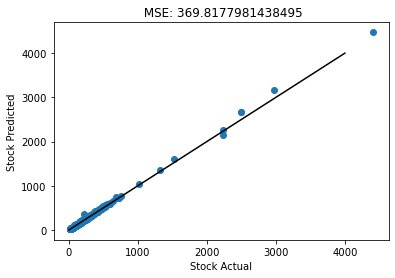

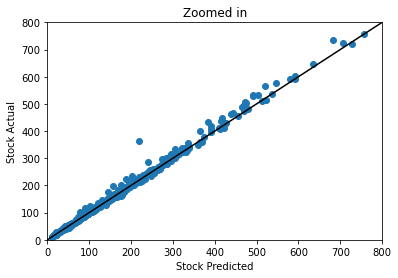

In [89]:
#Woah, looks like it.  Let's get some visualization going.
#Run the prediction
all_x, all_y = [], []
past_index = 770-120
for i in range(0,len(scaled_data)):
    all_x.append(scaled_data[i][past_index:770])
    all_y.append(scaled_data[i][770])
all_y, all_x = np.array(all_y), np.array(all_x)
all_x = np.reshape(all_x, (all_x.shape[0],all_x.shape[1],1))
#pred_y = np.reshape(pred_y, (pred_y.shape[0],pred_y.shape[1],1))
pred_y = model.predict(all_x)
#scaler.inverse_transform on the results to get the predicted stock prices
all_y_unscaled = []
pred_y_unscaled = []
for i in range(0, len(scaler.min_)-1):
    scale = MinMaxScaler()
    a, b = scaler.data_min_[i], scaler.data_max_[i]
    unscaled_y = all_y[i] * (b - a) + a
    unscaled_y_pred = pred_y[i] * (b - a) + a
    all_y_unscaled.append(unscaled_y)
    pred_y_unscaled.append(unscaled_y_pred)
#Figure out how many values are from each date
#Graph over time (There are 24 dates with 21 inputs therefore every 22nd inputs is a new day.
x=np.linspace(0,4000,4001) 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
plt.scatter(all_y_unscaled, pred_y_unscaled)
plt.plot(x,x,'k-') # identity line
plt.title(" MSE: " + str(mean_squared_error(all_y_unscaled, pred_y_unscaled)))
plt.xlabel("Stock Actual")
plt.ylabel("Stock Predicted")
plt.show()

ax3 = plt.subplot()
ax3.scatter(all_y_unscaled, pred_y_unscaled)
ax3.set_xlabel("Stock Predicted")
ax3.set_ylabel("Stock Actual")
ax3.set_title('Zoomed in')
ax3.set_ylim(bottom=0)
ax3.set_xlim(left=0)
ax3.set_ylim(top=800)
ax3.set_xlim(right=800)
plt.plot(x,x,'k-') # identity line

F1 Score: 0.15699658703071673.


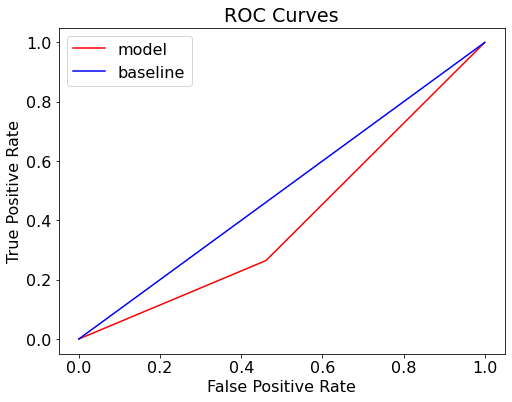

array([[214, 183],
       [ 64,  23]], dtype=int64)

In [153]:
#So, this looks pretty good!  but... I mean... is it?  little variances matter.
#The real meat is predicted if the stock went up or down.
stock_went_up_actual = []
stock_went_up_pred = []
for i in range(0,len(scaled_data)):
    if (scaled_data[i][769] < scaled_data[i][770]):
        stock_went_up_actual.append(1)
    else:
        stock_went_up_actual.append(0)
    if (scaled_data[i][769] < pred_y[i]):
        stock_went_up_pred.append(1)
    else:
        stock_went_up_pred.append(0)
from sklearn import metrics
print(f"F1 Score: {metrics.f1_score(stock_went_up_actual, stock_went_up_pred)}.")
fpr, tpr, threshholds = metrics.roc_curve(stock_went_up_actual,stock_went_up_pred,pos_label=1)
base_fpr, base_tpr, _ = metrics.roc_curve(stock_went_up_actual, [1 for _ in range(len(stock_went_up_actual))])
plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 16
plt.plot(fpr, tpr, 'r', label = 'model')
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.legend();
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
plt.show();
metrics.confusion_matrix(stock_went_up_actual, stock_went_up_pred)

In [154]:
#Well, that's not all good.  Let's bring in those sentiment scores and see what that does for us!
regression_df = pd.DataFrame()
pred_y = pred_y.flatten()
regression_df['Last Known Close'] = scaled_data[:,769]
regression_df['Estimated Close'] = pred_y
regression_df['Sentiment Score'] = dataframe['Sentiment Score']
regression_df['True Close'] = all_y
score_scaler = MinMaxScaler()
regression_df['Sentiment Score'] = score_scaler.fit_transform(regression_df[['Sentiment Score']])
regression_df

,Last Known Close,Estimated Close,Sentiment Score,True Close
0,0.365750,0.372306,0.84375,0.378940
1,0.617417,0.601457,0.53125,0.617417
2,0.760682,0.738435,0.53125,0.769964
3,0.834691,0.914884,0.78125,0.851168
4,0.795596,0.753991,0.90625,0.753511
...,...,...,...,...
479,1.000000,0.958733,0.62500,0.998028
480,0.370562,0.379689,0.53125,0.366630
481,0.840175,0.802244,0.68750,0.824873
482,0.522934,0.565888,0.84375,0.504437


In [155]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
train_df = regression_df.head(n=(int(len(regression_df.index)*0.8)))
test_df = regression_df.tail(n=(int(len(regression_df.index)*0.2)))
train_X = train_df[train_df.columns[:-1]]
train_Y = train_df['True Close']
test_X = test_df[test_df.columns[:-1]]
test_Y = test_df['True Close']
#np.random.seed(1)
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(n_restarts_optimizer=9)#kernel=kernel)
gp.fit(train_X,train_Y)
y_pred, sigma = gp.predict(regression_df[regression_df.columns[:-1]], return_std=True)

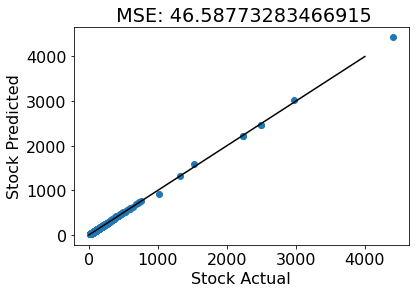

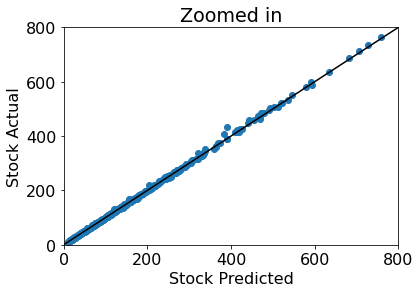

In [156]:
all_y_unscaled = []
pred_y_unscaled = []
for i in range(0, len(scaler.min_)):
    scale = MinMaxScaler()
    a, b = scaler.data_min_[i], scaler.data_max_[i]
    unscaled_y = all_y[i] * (b - a) + a
    unscaled_y_pred = y_pred[i] * (b - a) + a
    all_y_unscaled.append(unscaled_y)
    pred_y_unscaled.append(unscaled_y_pred)
#Figure out how many values are from each date
#Graph over time (There are 24 dates with 21 inputs therefore every 22nd inputs is a new day.
x=np.linspace(0,4000,4001) 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
plt.scatter(all_y_unscaled, pred_y_unscaled)
plt.plot(x,x,'k-') # identity line
plt.title(" MSE: " + str(mean_squared_error(all_y_unscaled, pred_y_unscaled)))
plt.xlabel("Stock Actual")
plt.ylabel("Stock Predicted")
plt.show()

ax3 = plt.subplot()
ax3.scatter(all_y_unscaled, pred_y_unscaled)
ax3.set_xlabel("Stock Predicted")
ax3.set_ylabel("Stock Actual")
ax3.set_title('Zoomed in')
ax3.set_ylim(bottom=0)
ax3.set_xlim(left=0)
ax3.set_ylim(top=800)
ax3.set_xlim(right=800)
plt.plot(x,x,'k-') # identity line

F1 Score: 0.24137931034482757.


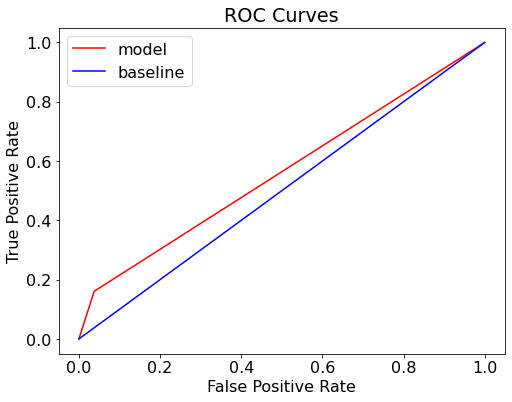

array([[382,  15],
       [ 73,  14]], dtype=int64)

In [157]:
#Woah!  Now that's a much lower MSE, but that's maybe to be expected.  Let's see the other metrics
stock_went_up_actual = []
stock_went_up_pred = []
for i in range(0,len(scaled_data)):
    if (scaled_data[i][769] < scaled_data[i][770]):
        stock_went_up_actual.append(1)
    else:
        stock_went_up_actual.append(0)
    if (scaled_data[i][769] < y_pred[i]):
        stock_went_up_pred.append(1)
    else:
        stock_went_up_pred.append(0)
from sklearn import metrics
print(f"F1 Score: {metrics.f1_score(stock_went_up_actual, stock_went_up_pred)}.")
fpr, tpr, threshholds = metrics.roc_curve(stock_went_up_actual,stock_went_up_pred,pos_label=1)
base_fpr, base_tpr, _ = metrics.roc_curve(stock_went_up_actual, [1 for _ in range(len(stock_went_up_actual))])
plt.figure(figsize = (8, 6))
plt.rcParams['font.size'] = 16
plt.plot(fpr, tpr, 'r', label = 'model')
plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
plt.legend();
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
plt.show();
metrics.confusion_matrix(stock_went_up_actual, stock_went_up_pred)

In [164]:
final_df = pd.DataFrame()
final_df['Symbol'] = df['Symbol']
final_df['Last Known Close'] = LTSM_df[769]
final_df['Sentiment Score'] = dataframe['Sentiment Score']
final_df['Estimated Close'] = pred_y_unscaled
stock_went_up_pred_arrows = map(lambda x: '↑' if (x==1) else '↓', stock_went_up_pred)
final_df['Stock Direction'] = list(stock_went_up_pred_arrows)
final_df['Confidence'] = (1/sigma)/max(1/sigma)
final_df

,Symbol,Last Known Close,Sentiment Score,Estimated Close,Stock Direction,Confidence
0,MMM,150.589996,13.0,149.121646,↓,0.253008
1,AOS,66.300003,3.0,66.089213,↓,0.589340
2,ABT,122.639999,3.0,121.608772,↓,0.628731
3,ABBV,156.699997,11.0,155.820274,↓,0.213475
4,ABMD,325.980011,15.0,314.678513,↓,0.322001
...,...,...,...,...,...,...
479,XEL,75.349998,6.0,74.635333,↓,0.697858
480,XYL,86.800003,3.0,87.523112,↑,0.294929
481,YUM,125.699997,8.0,124.981583,↓,0.767151
482,ZBRA,398.420013,13.0,390.784056,↓,0.375928


In [165]:
#That's a pretty considerable improvement.  Let's save these models, and try for some blind application.
model.save("models/sequential")
import pickle
# save the model to disk
filename = 'models/gpr_model.sav'
pickle.dump(gp, open(filename, 'wb')) 

INFO:tensorflow:Assets written to: models/sequential\assets


INFO:tensorflow:Assets written to: models/sequential\assets
